<a href="https://colab.research.google.com/github/MeghanGH/time-series-with-python/blob/main/Machine_learning_for_time_series_data_in_pytho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# Time Series and Machine Learning Primer



*   array.shape()
*   Always visualize your data





In [ ]:
prices_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/prices.csv'
# prices = pd.read_csv(prices_csv, parse_dates=['date'], index_col='date')
prices = pd.read_csv(prices_csv)
print(prices.head())

         date symbol       close       volume
0  2010-01-04   AAPL  214.009998  123432400.0
1  2010-01-04    ABT   54.459951   10829000.0
2  2010-01-04    AIG   29.889999    7750900.0
3  2010-01-04   AMAT   14.300000   18615100.0
4  2010-01-04   ARNC   16.650013   11512100.0


[Text(0.5, 1.0, 'AAPL daily closing price')]

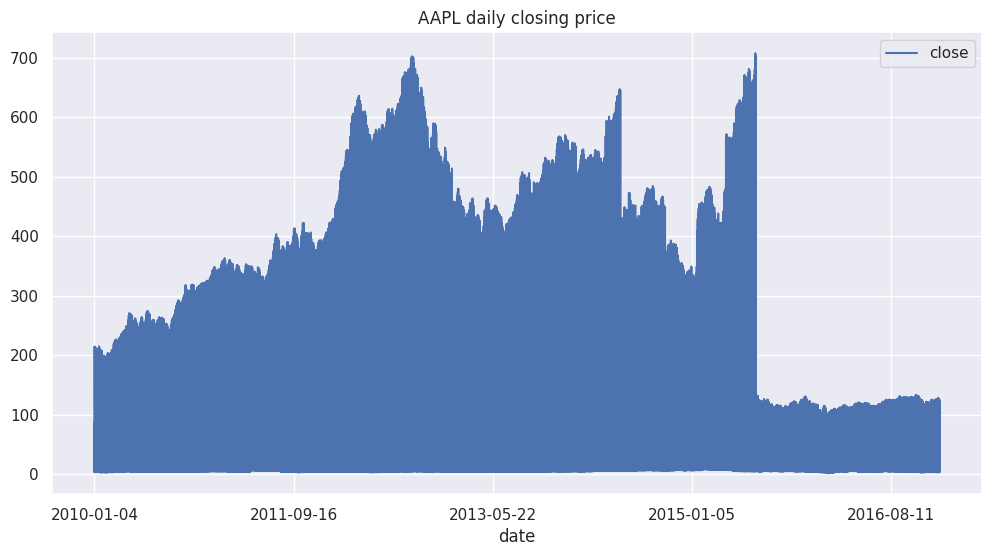

In [34]:
# Plot the time series in each dataset
fig, ax = plt.subplots(figsize=(12, 6))
prices.plot(x='date',y='close', ax=ax)
ax.set(title="AAPL daily closing price")

# Using matplotlibfig, ax = plt.subplots()ax.plot(...)
# Using pandasfig, ax = plt.subplots()df.plot(..., ax=ax)


### Fitting a simple model: classification

In [42]:
from sklearn.svm import LinearSVC
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()

# Create a Pandas DataFrame from the Iris data
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (species) column to the DataFrame
data['target'] = iris.target

# Extract the specific columns you need
X = data[['petal length (cm)', 'petal width (cm)']]
y = data[['target']]

# Fit the model
model = LinearSVC()

model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


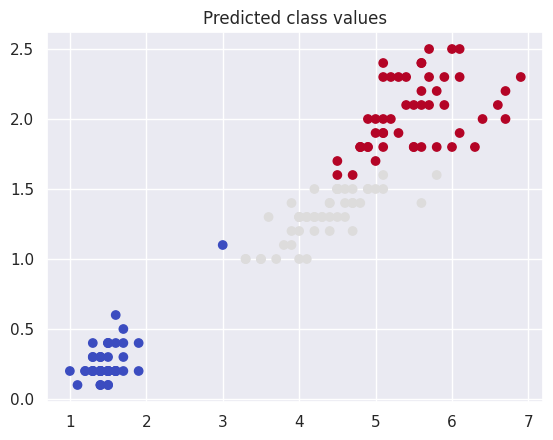

In [28]:
# Create input array
X_predict = X

# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

### Fitting a simple model: regression

In [21]:
from sklearn.datasets import fetch_california_housing

california_housing_data = fetch_california_housing(as_frame=True)
housing = california_housing_data.data
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


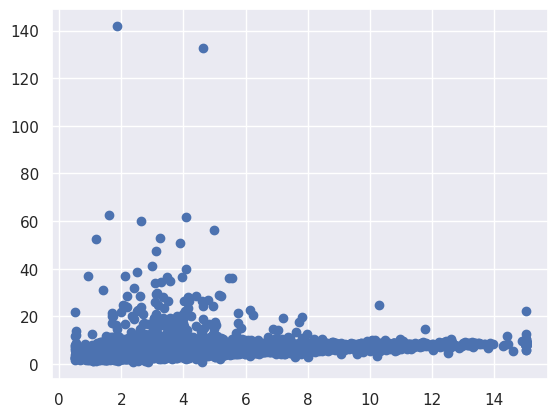

In [38]:
from sklearn import linear_model

# Prepare input and output DataFrames
X = housing[['MedInc']]
y = housing[['AveRooms']]

# Fit the model
model = linear_model.LinearRegression()
model.fit(X, y)
plt.scatter(X, y)
plt.show()

### Predicting using a regression model

In [60]:
# Generate predictions with the model using the input data
 # Convert to a NumPy array
# X = housing[['MedInc']].values

X = housing[['MedInc']]

# Reshape the array
Xtrain= X.reshape(-1, 1)

predictions = model.predict(Xtrain)

# Visualize the inputs and predicted values
plt.scatter(Xtrain, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()


AttributeError: ignored

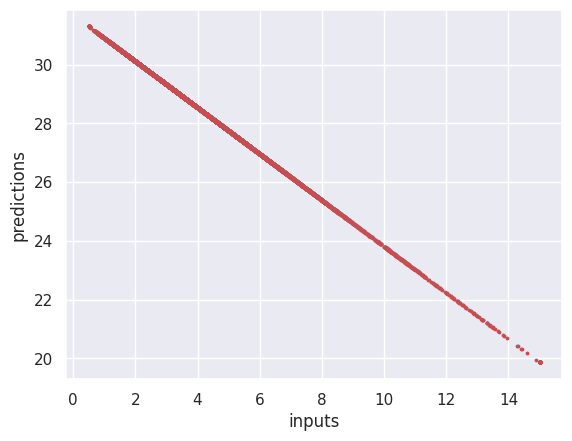

In [58]:
from sklearn.linear_model import LinearRegression

# Prepare input and output DataFrames
X = housing[['MedInc']]
y = housing[['HouseAge']]

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Generate predictions with the model using the input data
predictions = model.predict(X)

# Visualize the inputs and predicted values
plt.scatter(X, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()
